## Edward Billy Hadipuspito - 1301201291
### Assignment1 - AI Enabled IoT, Data Filtering

---



### Import Library and Dataset

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

df = pd.read_csv('https://raw.githubusercontent.com/edward-billy/lpf-mva-filtering/main/4.csv', on_bad_lines='skip')
df = df.loc[df.iloc[:,4] == 5] #Filtering GoingUpDown Stairs Only
df = df.reset_index(drop=True)

X = df.iloc[:, 1] #Kolom [1] = B = X
Y = df.iloc[:, 2]

In [ ]:
X

0         2041
1         2046
2         2046
3         2045
4         2042
          ... 
122195    2056
122196    2059
122197    2063
122198    2071
122199    2064
Name: 2045, Length: 122200, dtype: int64

### Functions

---



In [ ]:
def lowpass(cutoff, fs, order): 
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False) #butterworth filter
    return b, a

def lowpassFilter(data, cutoff, fs, order):
    b, a = lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def mvaFilter(data,window_size):
  hasil = data.rolling(window=window_size).mean()
  return hasil

### Main Program

---



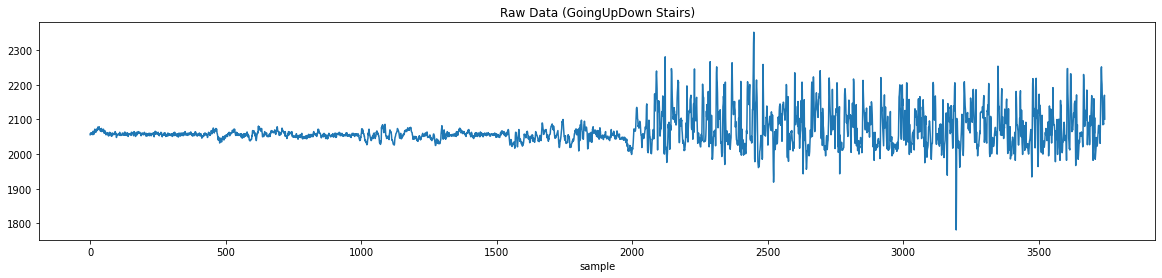

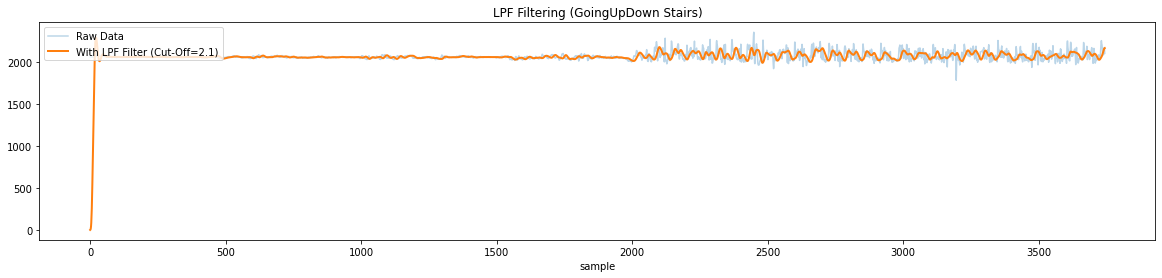

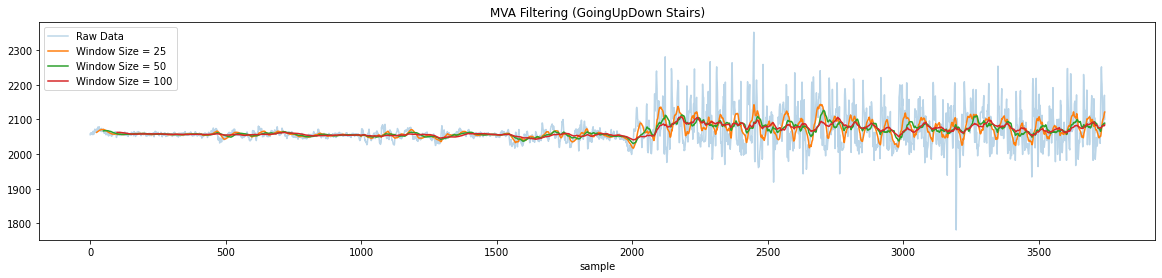

In [ ]:
plt.rcParams["figure.figsize"] = (20,4) #plot size

order = 4
fs = 52 #frequency sample
cutoff = 2.1 #frequency cutoff

lpf = lowpassFilter(X, cutoff, fs, order)

plt.plot(X)
plt.xlabel('sample')
plt.title("Raw Data (GoingUpDown Stairs)")
plt.show() #plot raw data

plt.plot(X, alpha = 0.3, label="Raw Data")
plt.plot(lpf, linewidth=2, label="With LPF Filter (Cut-Off=2.1)")
plt.xlabel('sample')
plt.title("LPF Filtering (GoingUpDown Stairs)")
plt.legend(loc='upper left')
plt.show() #plot lpf filter

plt.plot(X,alpha = 0.3, label="Raw Data")
mvaFilter(X,25).plot(label="Window Size = 25")
mvaFilter(X,50).plot(label="Window Size = 50")
mvaFilter(X,100).plot(label="Window Size = 100")
plt.xlabel('sample')
plt.title("MVA Filtering (GoingUpDown Stairs)")
plt.legend(loc='upper left')
plt.show() #plot mva filter